# Modelado de Series de Tiempo

* Una serie de tiempo es una secuencia de observaciones registradas en intervalos de tiempo regulares. Análogamente, es posible tener series espaciales.

* Habitualmente, una serie de tiempo puede ser por segundos, por minutos, horaria, diaria, semanal, mensual, trimestral o anual dependiendo de la frecuencia en la que se registraron de las observaciones.

* Una manera de reducir la frecuencia es promediar los valores correspondientes según la unidad de tiempo. Por ejemplo, si una serie es horaria y se han registrado datos cada tres horas, se tienen ocho datos cada 24 horas (unidad de tiempo día); entonces, es posible reducirla a una frecuencia diaria, tomando el promedio de los datos registrados para el día correspondiente.

* El modelado de series de tiempo es el conjunto de pasos previos requeridos para realizar un pronóstico de series de tiempo. El modelado implica el preprocesamiento (extracción, transformación, imputación), análisis (tendencias, ciclos) de una serie de tiempo. En resumen, el modelado es la búsqueda de un modelo para representar  una serie de tiempo.

* Evidentemente el análisis de series de tiempo tiene una importancia significativa para comprender los fenómenos que dependen del tiempo, por ejemplo: demanda de productos, ventas, visitantes, vacunaciones, precios de acciones, portafolios, enfermedades, etc. Su análisis implica comprender varios aspectos sobre la naturaleza inherente de la serie con el fin de crear pronósticos significativos y precisos para tomar decisiones informadas. 


# Importar Series de Tiempo en Python

* Los datos de una serie de tiempo habitualmente se archivos `.csv`, también se usan otros formatos de hoja de cálculo `.xlsx` o provienen de conexiones por SQL; suelen contiener dos columnas: la fecha y el valor medido / registrado.

* Un modo para importar desde `.csv` es usar el paquete de pandas `read_csv()`. En este caso leeremos un archivo CSV con datos sobre las ventas mensuales de medicamentos para diabéticos en Australia.

In [109]:
# Instalamos Seaborn, es una librería para la visualización de datos de Python basada en matplotlib. 
# Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos. 
!pip3 install seaborn

# Instalamos statsmodels para implementar este tipo de modelos
!pip3 install statsmodels

# Instalamos sklearn para implemetar modelos de aprendizaje de máquinas
!pip3 install sklearn

# Utilidades para modelos arima
!pip3 install pmdarima

    100% |################################| 1.5MB 300kB/s ta 0:00:01
    100% |################################| 2.0MB 440kB/s ta 0:00:01
    100% |################################| 13.4MB 51kB/s ta 0:00:011
  Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1


In [2]:
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/serie.csv

--2021-05-13 16:20:12--  https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/serie.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4465 (4.4K) [text/plain]
Saving to: 'serie.csv'

serie.csv           100%[===================>]   4.36K  --.-KB/s    in 0.002s  

2021-05-13 16:20:12 (2.09 MB/s) - 'serie.csv' saved [4465/4465]



In [5]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Definimos el tamaño de las imágenes (ancho y alto en pulgadas) 
# y la cantidad de puntos por pulgada
plt.rcParams.update({'figure.figsize': (8, 5), 'figure.dpi': 100})

# Se cargan los datos en un dataframe, pero no se indexan por fecha
datosDf = pd.read_csv('serie.csv', parse_dates=['date'])
datosDf.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [7]:
# Se cargan los datos en un dataframe, se indexan por fecha
# nótese que ahora el indice 0, 1, 2, 3... no aparece como columna
serieDf = pd.read_csv('serie.csv', parse_dates=['date'], index_col='date')
serieDf.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


# Paneles de Datos (Dataframes con Columnas)

* Los páneles también son un conjunto de datos basado en el tiempo. Los páneles pueden almacenar más variables relacionadas con el mismo fenómeno de la serie. Por ejemplo, si son series de tiempo que miden la calidad del aire, también es posible almacenar los parámetros o datos de las estaciones de monitoreo.

* Otro caso, se pueden tener columnas adicionales, como las variables explicativas que pueden ser útiles para modelar y predecir la serie.

* A continuación, se cargan los datos de "Llegadas de cultivos importantes al mercado de la India por distrito" disponible [aquí](https://punjab.data.gov.in/catalog/district-wise-market-arrivals-important-crops#web_catalog_tabs_block_10)

In [126]:
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/MarketArrivals.csv
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/guinearice.csv
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/sunspotarea.csv
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/AirPassengers.csv
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/a10_missings.csv
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/elecequip.csv
!wget https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/wwwusage.csv

--2021-05-14 17:55:06--  https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/MarketArrivals.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674493 (659K) [text/plain]
Saving to: 'MarketArrivals.csv'

MarketArrivals.csv  100%[===================>] 658.68K   418KB/s    in 1.6s    

2021-05-14 17:55:09 (418 KB/s) - 'MarketArrivals.csv' saved [674493/674493]

--2021-05-14 17:55:10--  https://raw.githubusercontent.com/fernanvilla/MOSIS_2021_1S/main/datos/guinearice.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [17]:
# Este data frame tienen propiedades especiales para consultar por columnas
panelDatos = pd.read_csv('MarketArrivals.csv')
print(type(panelDatos))

panelDatos = panelDatos.loc[panelDatos.market=='VANI(MS)', :]
panelDatos.head()

<class 'pandas.core.frame.DataFrame'>


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
9904,VANI(MS),January,2007,27598,701,1043,899,MS,VANI,January-2007
9905,VANI(MS),January,2008,46440,194,382,274,MS,VANI,January-2008
9906,VANI(MS),January,2009,37382,500,1434,1308,MS,VANI,January-2009
9907,VANI(MS),January,2010,58122,457,1744,1341,MS,VANI,January-2010
9908,VANI(MS),January,2011,15596,929,3618,2490,MS,VANI,January-2011


# Visualización de Series de Tiempo

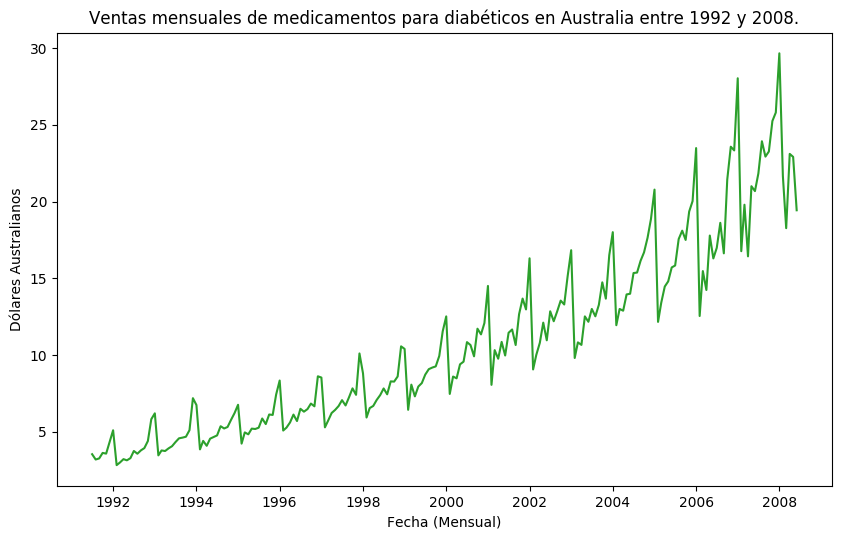

In [28]:
# Usamos el paquete para graficar
import matplotlib.pyplot as plt

#Leemos la serie de datos (no es necesario hacerlo de nuevo)
# serieDf = pd.read_csv('serie.csv', parse_dates=['date'], index_col='date')

# Creamos una función que después podemos reusar
def dibujarSerie(datosDf, title="", xlabel='Date', ylabel='Value', dpi=100):
    x=datosDf.index
    y=datosDf.value
    plt.figure(figsize=(10,6), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

dibujarSerie(serieDf, xlabel='Fecha (Mensual)', ylabel='Dólares Australianos',
        title='Ventas mensuales de medicamentos para diabéticos en Australia entre 1992 y 2008.')    

## Vista Espejo

* Dado que todos los valores de la serie son positivos, es posible realizar la visualización en "modo espejo" o "modo vista de dos lados", mostrar la serie en ambos lados del eje Y para enfatizar el crecimiento.


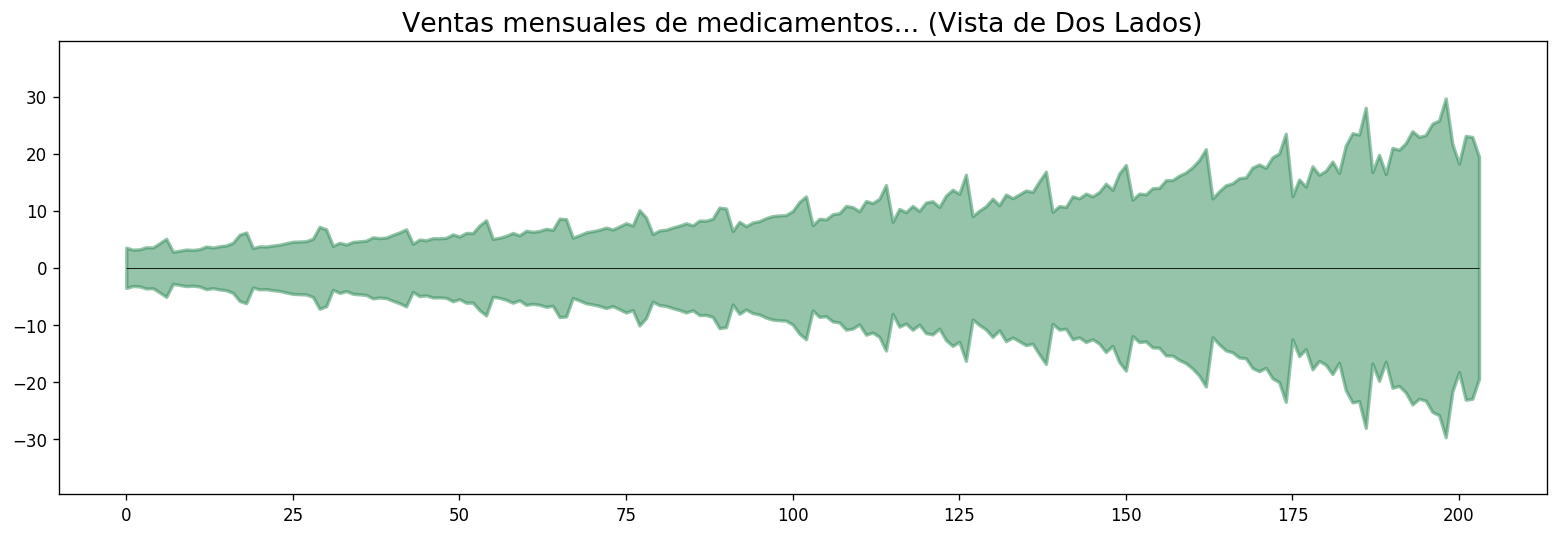

In [42]:

x = datosDf.index
y1 = datosDf.value

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-np.max(y1)-10, np.max(y1)+10)
plt.title('Ventas mensuales de medicamentos... (Vista de Dos Lados)', fontsize=16)
# Grafica la Linea del eje y
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

## Gráficos estacionales

* Dado que es una serie de tiempo mensual y sigue un cierto patrón repetitivo cada año, es posible trazar cada año como una línea separada en la misma trama. Esto permite comparar los patrones anuales uno sobre el otro.

* Hay una fuerte caída en las ventas de medicamentos cada febrero, aumentando nuevamente en marzo, cayendo nuevamente en abril y así sucesivamente. Claramente, el patrón se repite dentro de un año determinado, todos los años.

* Sin embargo, a medida que avanzan los años, las ventas de medicamentos aumentan en general. Puede visualizar muy bien esta tendencia y cómo varía cada año en un bonito diagrama de caja anual. Asimismo, puede hacer un diagrama de caja mensual para visualizar las distribuciones mensuales. 

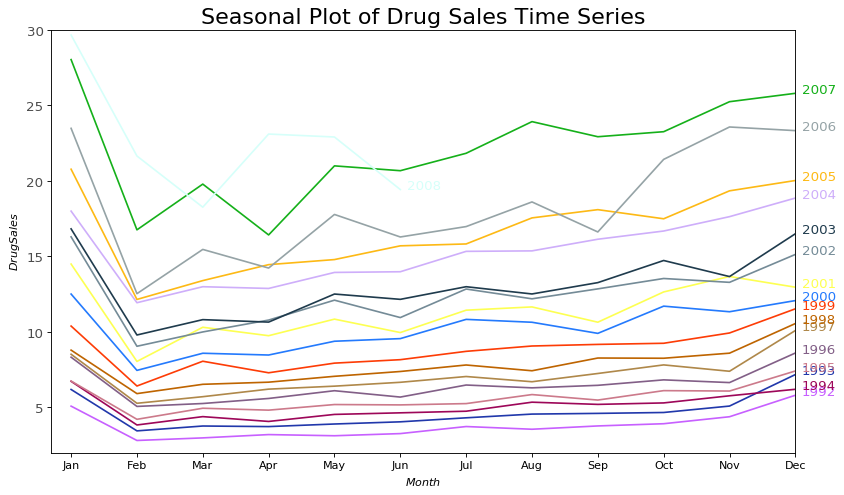

In [44]:
# Import Data
df = datosDf
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(12,7), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

## Boxplot mea a mes (estacional) y distribución año a año (tendencia) 

* Puede agrupar los datos en intervalos estacionales y ver cómo se distribuyen los valores dentro de un año o mes determinado y cómo se comparan a lo largo del tiempo. 

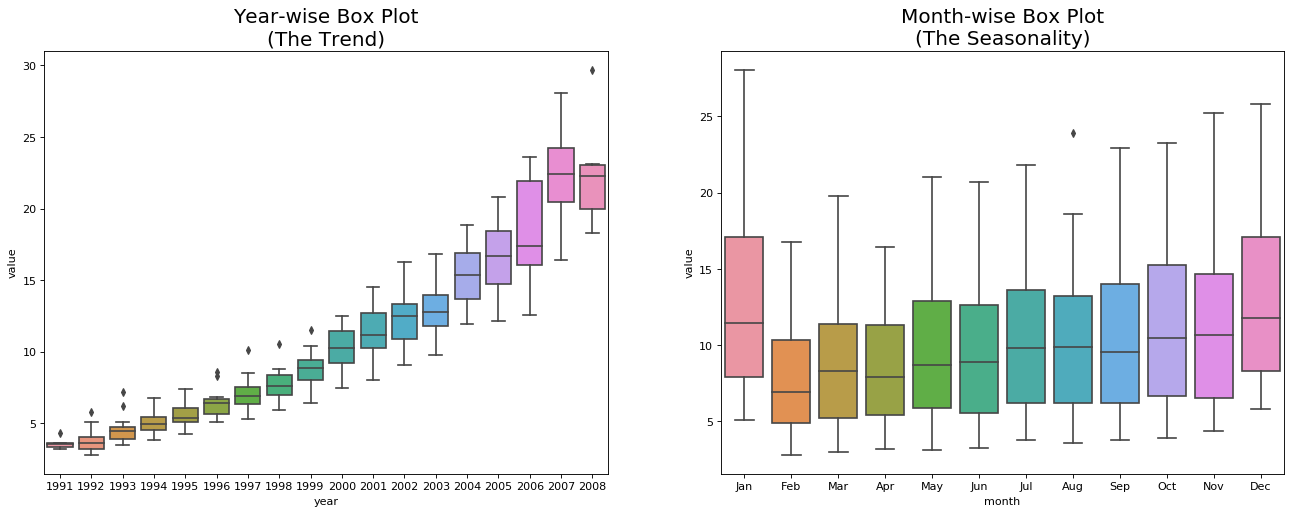

In [47]:
# Import Data
df = datosDf
#df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Patrones en Series de Tiempo

* Cualquier serie temporal puede dividirse en los siguientes componentes: Nivel base + Tendencia + Estacionalidad + Error

* Se observa una tendencia cuando se observa una pendiente creciente o decreciente en la serie de tiempo. Mientras que la estacionalidad se observa cuando se observa un patrón repetido distinto entre intervalos regulares debido a factores estacionales. Podría deberse al mes del año, el día del mes, los días de la semana o incluso la hora del día.

* Sin embargo, no es obligatorio que todas las series temporales deban tener una tendencia y / o estacionalidad. Es posible que una serie temporal no tenga una tendencia distinta, pero sí una estacionalidad. Lo contrario también puede ser cierto.

* Por lo tanto, una serie de tiempo se puede imaginar como una combinación de la tendencia, la estacionalidad y los términos de error. 

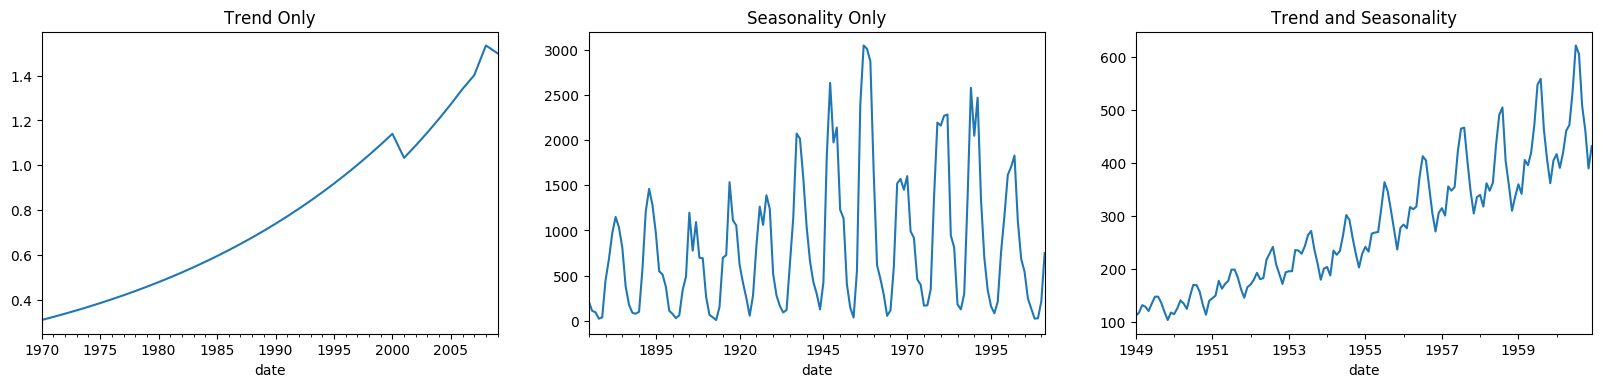

In [49]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

* Otro aspecto a considerar es el comportamiento cíclico. Ocurre cuando el patrón de subida y bajada de la serie no ocurre en intervalos fijos basados en el calendario. Se debe tener cuidado de no confundir el efecto "cíclico" con el efecto "estacional".

Entonces, ¿cómo diferenciar entre un patrón "cíclico" y "estacional"?

* Si los patrones no son de frecuencias fijas basadas en el calendario, entonces es cíclico. Porque, a diferencia de la estacionalidad, los efectos cíclicos suelen estar influenciados por el negocio y otros factores socioeconómicos. 

## Series de tiempo aditivas y multiplicativas 

Dependiendo de la naturaleza de la tendencia y la estacionalidad, una serie de tiempo se puede modelar como aditivo o multiplicativo, en donde, cada observación en la serie puede expresarse como una suma o un producto de los componentes:

* Serie de tiempo aditiva:
    `y(t) = Nivel base + Tendencia + Estacionalidad + Error`

* Serie de tiempo multiplicativa:
    `y(t) = Nivel base x Tendencia x Estacionalidad x Error`
    
## ¿Cómo descomponer una serie de tiempo en sus componentes? 

* Puede hacer una descomposición clásica de una serie de tiempo considerando la serie como una combinación aditiva o multiplicativa del nivel base, la tendencia, el índice estacional y el residual.

* `Seasonal_decompose` en `statsmodels` implementa esto convenientemente. 

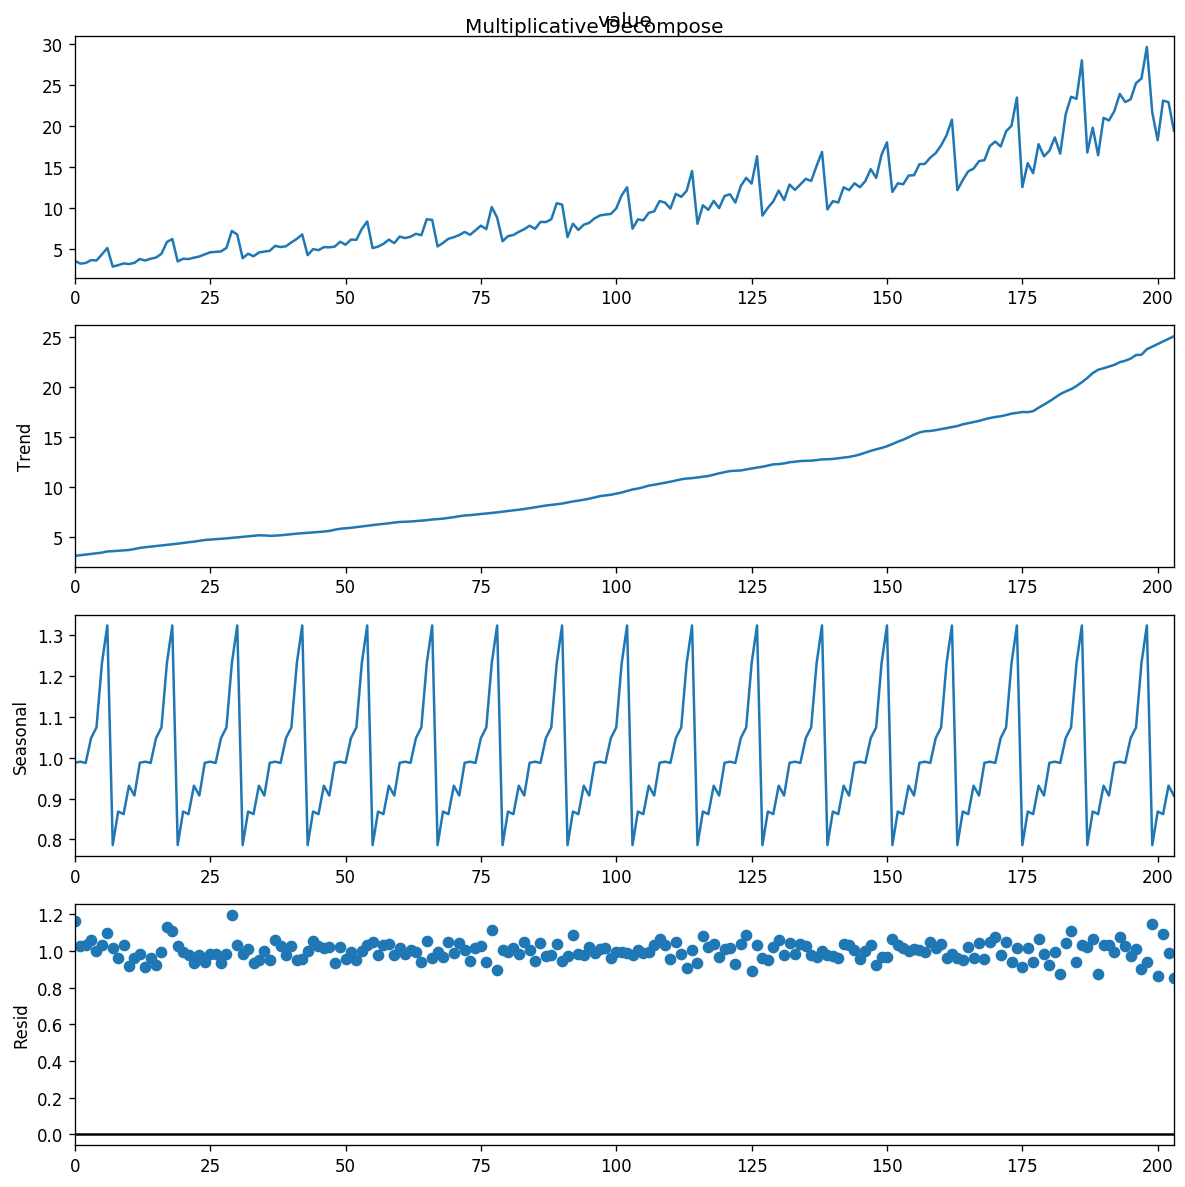

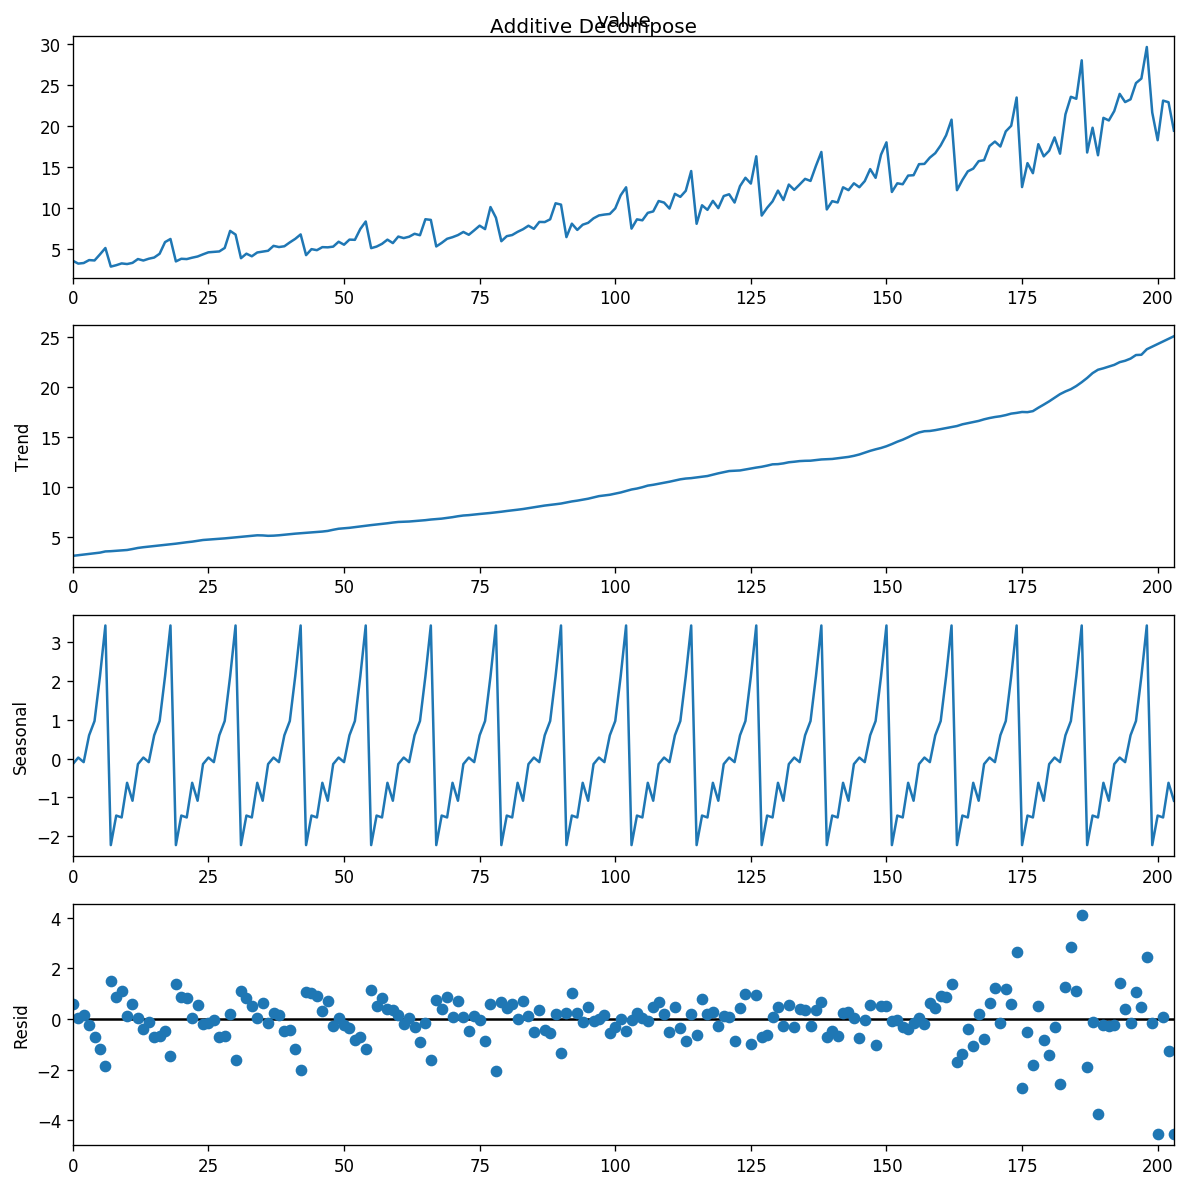

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = datosDf

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', 
                                extrapolate_trend='freq', period=12)

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', 
                                extrapolate_trend='freq', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=12)
result_add.plot().suptitle('Additive Decompose', fontsize=12)
plt.show()

* El establecimiento de extrapolate_trend = 'freq' se encarga de los valores perdidos en la tendencia y los residuos al comienzo de la serie.

* Si observa de cerca los residuos de la descomposición aditiva, le queda algo de patrón. Sin embargo, la descomposición multiplicativa parece bastante aleatoria, lo cual es bueno. Entonces, idealmente, se debería preferir la descomposición multiplicativa para esta serie en particular.

* La salida numérica de los componentes tendenciales, estacionales y residuales se almacenan en la propia salida result_mul. Vamos a extraerlos y ponerlos en un marco de datos. 

In [61]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()


,seas,trend,resid,actual_values
0,0.987845,3.060085,1.166629,3.526591
1,0.990481,3.124765,1.027745,3.180891
2,0.987476,3.189445,1.032615,3.252221
3,1.048329,3.254125,1.058513,3.611003
4,1.074527,3.318805,0.999923,3.565869


In [65]:
# El resultado es el modelo multiplicativo
resultado = 0.987845 * 3.060085 * 1.166629
observado = 3.526591

print(round(resultado, 6))

3.526591


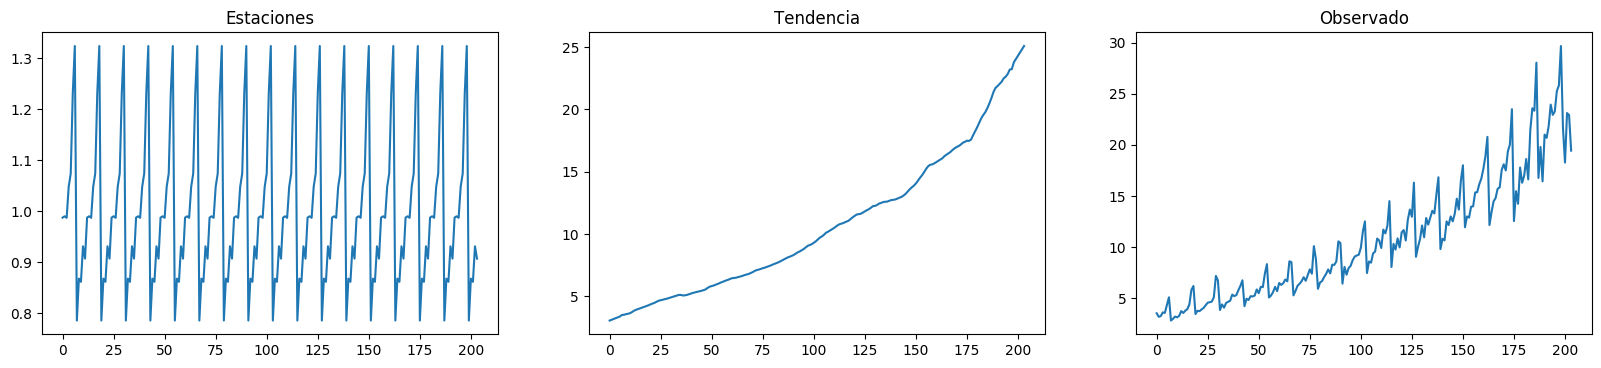

In [62]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
result_mul.seasonal.plot(title='Estaciones', legend=False, ax=axes[0])
result_mul.trend.plot(title='Tendencia', legend=False, ax=axes[1])
result_mul.observed.plot(title='Observado', legend=False, ax=axes[2])

# Series de tiempo estacionarias y no estacionarias 

* La estacionariedad es una propiedad de una serie de tiempo. Una serie estacionaria es aquella en la que los valores de la serie no son una función del tiempo.

* Es decir, las propiedades estadísticas de la serie como media, varianza y autocorrelación son constantes en el tiempo. La autocorrelación de la serie no es más que la correlación de la serie con sus valores anteriores, más adelante.

* Una identificación de serie de tiempo estacionaria desprovista de efectos estacionales también.

* Entonces, ¿cómo identificar si una serie es estacionaria o no? Tracemos algunos ejemplos para que quede claro: 

![Ejemplos de Series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png "Ejemplos de Series")

Entonces, ¿por qué es importante una serie estacionaria? ¿Por qué estoy hablando de eso?

* Llegaré a eso en un momento, pero entiendo que es posible hacer estacionaria casi cualquier serie de tiempo aplicando una transformación adecuada. La mayoría de los métodos de pronóstico estadístico están diseñados para funcionar en una serie de tiempo estacionaria. El primer paso en el proceso de pronóstico es típicamente realizar alguna transformación para convertir una serie no estacionaria en estacionaria. 

## ¿Cómo hacer estacionaria una serie temporal? 

* Puede hacer que la serie sea estacionaria de la siguiente manera:

     - Diferenciar la serie (una o más)
     - Toma el registro de la serie
     - Saca la raíz enésima de la serie
     - Combinación de los anteriores

* El método más común y conveniente para estacionar la serie es diferenciar la serie al menos una vez hasta que se vuelva aproximadamente estacionaria.

Entonces, ¿qué es diferenciar?

* Si $Y_t$ es el valor en el momento "t", entonces la primera diferencia de $Y = Y_t - Y_{t-1}$. En términos más simples, diferenciar la serie no es más que restar el siguiente valor por el valor actual.

* Si la primera diferencia no hace que una serie sea estacionaria, puede optar por la segunda diferenciación. Y así.

        Por ejemplo, considere la siguiente serie: [1, 5, 2, 12, 20]

        La primera diferenciación da: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]

        La segunda diferenciación da: [-3-4, -10-3, 8-10] = [-7, -13, -2] 

## ¿Por qué hacer estacionaria una serie no estacionaria antes de pronosticar?

* Pronosticar una serie estacionaria es relativamente fácil y los pronósticos son más confiables.

* Una razón importante es que los modelos de pronóstico autorregresivos son esencialmente modelos de regresión lineal que utilizan el o los rezagos de la propia serie como predictores.

* Sabemos que la regresión lineal funciona mejor si los predictores (variables X) no están correlacionados entre sí. Por lo tanto, estacionar la serie resuelve este problema, ya que elimina cualquier autocorrelación persistente, lo que hace que los predictores (rezagos de la serie) en los modelos de pronóstico sean casi independientes.

* Ahora que hemos establecido que estacionar la serie es importante, ¿cómo se comprueba si una serie determinada es estacionaria o no? 

## ¿Cómo probar la estacionariedad?

* La estacionariedad de una serie se puede establecer mirando la trama de la serie como hicimos antes.

* Otro método es dividir la serie en 2 o más partes contiguas y calcular las estadísticas de resumen como la media, la varianza y la autocorrelación. Si las estadísticas son bastante diferentes, es probable que la serie no sea estacionaria.

* Sin embargo, necesita un método para determinar cuantitativamente si una serie dada es estacionaria o no. Esto se puede hacer mediante pruebas estadísticas llamadas "Pruebas de raíz unitaria". Existen múltiples variaciones de esto, donde las pruebas verifican si una serie de tiempo no es estacionaria y posee una raíz unitaria.

* Hay varias implementaciones de pruebas de raíz unitaria como:

    - Prueba Dickey Fuller aumentada (prueba ADH)
    - Kwiatkowski-Phillips-Schmidt-Shin - Prueba KPSS (tendencia estacionaria)
    - Prueba de Philips Perron (prueba de PP)

* La más utilizada es la prueba ADF, donde la hipótesis nula es que la serie de tiempo posee una raíz unitaria y no es estacionaria. Entonces, si el valor P en la prueba ADH es menor que el nivel de significancia (0.05), rechaza la hipótesis nula.

* La prueba KPSS, por otro lado, se utiliza para probar la estacionariedad de la tendencia. La hipótesis nula y la interpretación del valor P es todo lo contrario de la prueba ADH. El siguiente código implementa estas dos pruebas usando el paquete statsmodels en python. 


In [68]:
from statsmodels.tsa.stattools import adfuller, kpss
df = datosDf

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c', nlags="auto")
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930674
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


# ¿Cuál es la diferencia entre ruido blanco y una serie estacionaria? 

* Al igual que una serie estacionaria, el ruido blanco tampoco es una función del tiempo, es decir, su media y la varianza no cambia con el tiempo. Pero la diferencia es que el ruido blanco es completamente aleatorio con una media de 0.

* En ruido blanco no hay patrón alguno. Si considera las señales de sonido en una radio FM como una serie de tiempo, el sonido en blanco que escucha entre los canales es ruido blanco.

* Matemáticamente, una secuencia de números completamente aleatorios con media cero es un ruido blanco. 

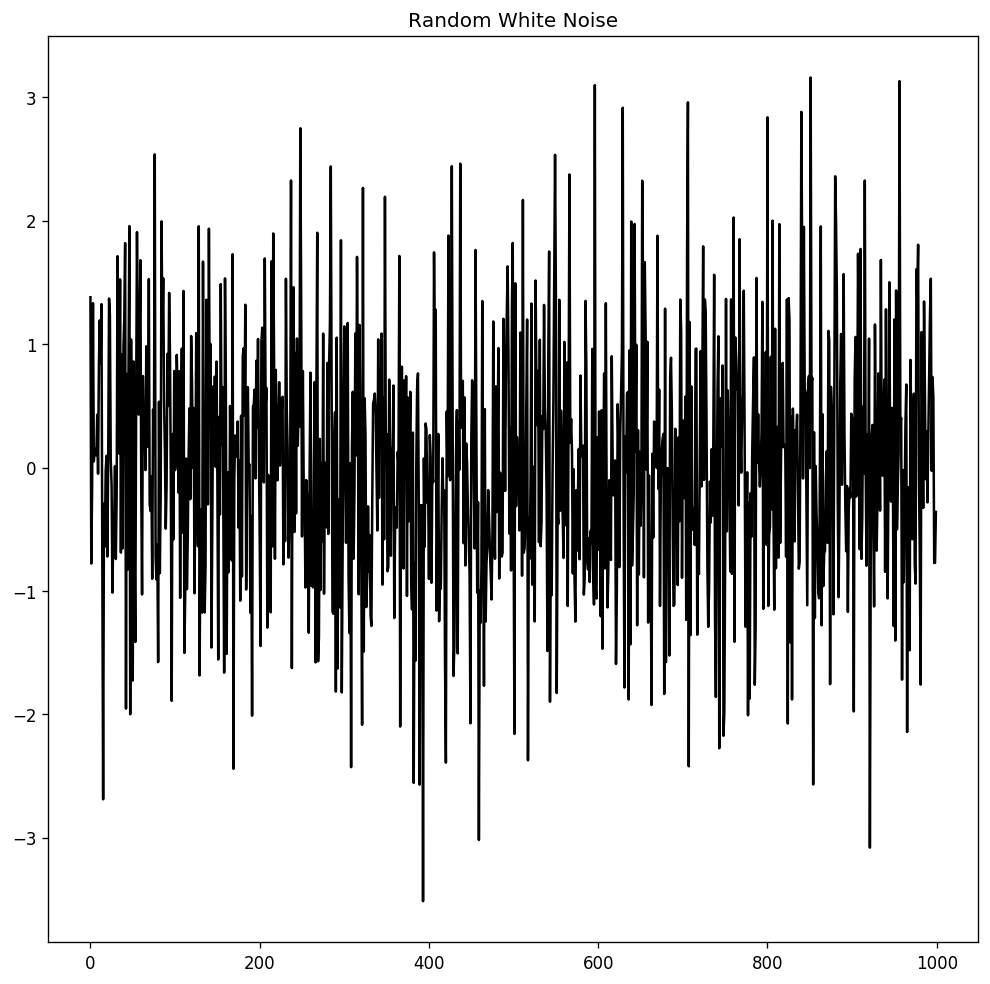

In [69]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

# ¿Cómo eliminar la tendencia de una serie de tiempo?

* Eliminar la tendencia de una serie de tiempo es quitar la componente de tendencia de la serie. Pero, ¿cómo extraer la tendencia? Existen múltiples enfoques:

1. Reste la línea de mejor ajuste de la serie de tiempo. La línea de mejor ajuste puede obtenerse de un modelo de regresión lineal con los pasos de tiempo como predictor. Para tendencias más complejas, es posible que desee utilizar términos cuadráticos $x^2$ en el modelo.

2. Reste el componente de tendencia obtenido de la descomposición de series de tiempo que vimos anteriormente.

3. Resta la media

4. Aplique un filtro como el filtro Baxter-King (statsmodels.tsa.filters.bkfilter) o el filtro Hodrick-Prescott (statsmodels.tsa.filters.hpfilter) para eliminar las líneas de tendencia de la media móvil o los componentes cíclicos.

* Implementemos los dos primeros métodos. 

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

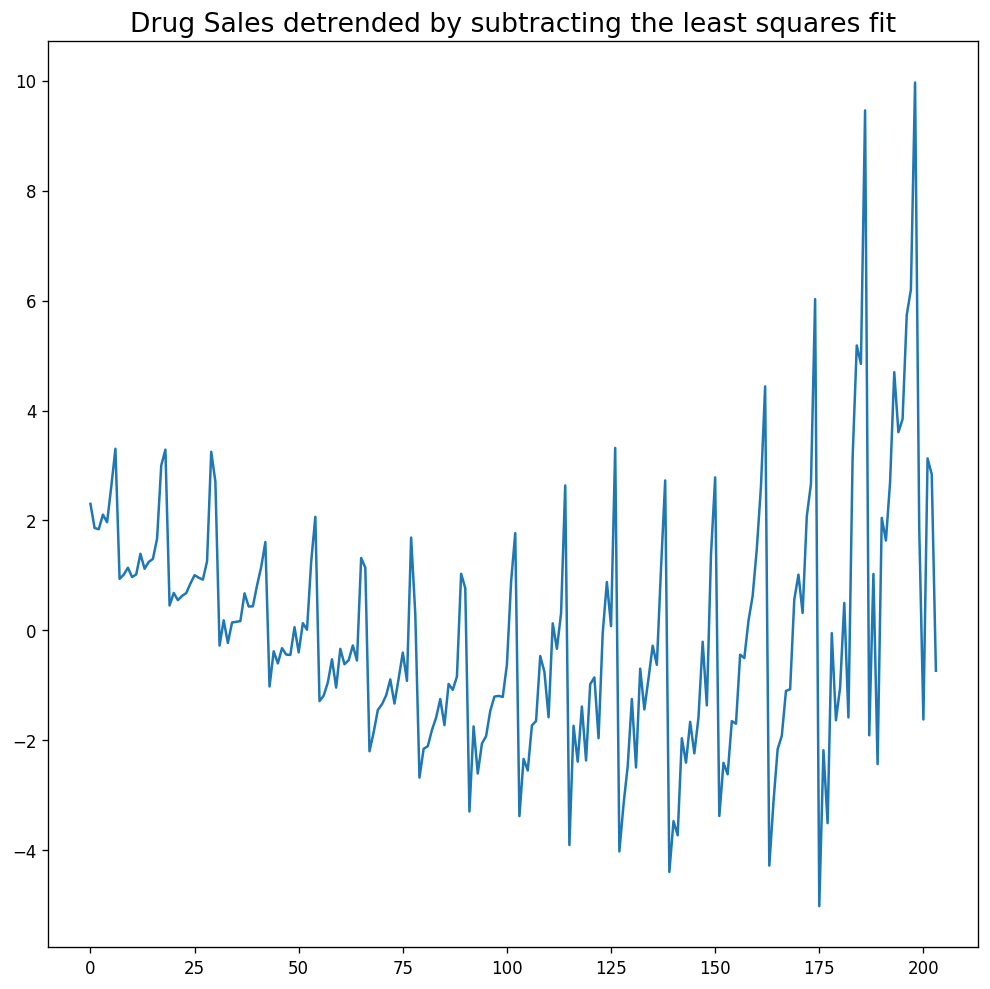

In [70]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = datosDf
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

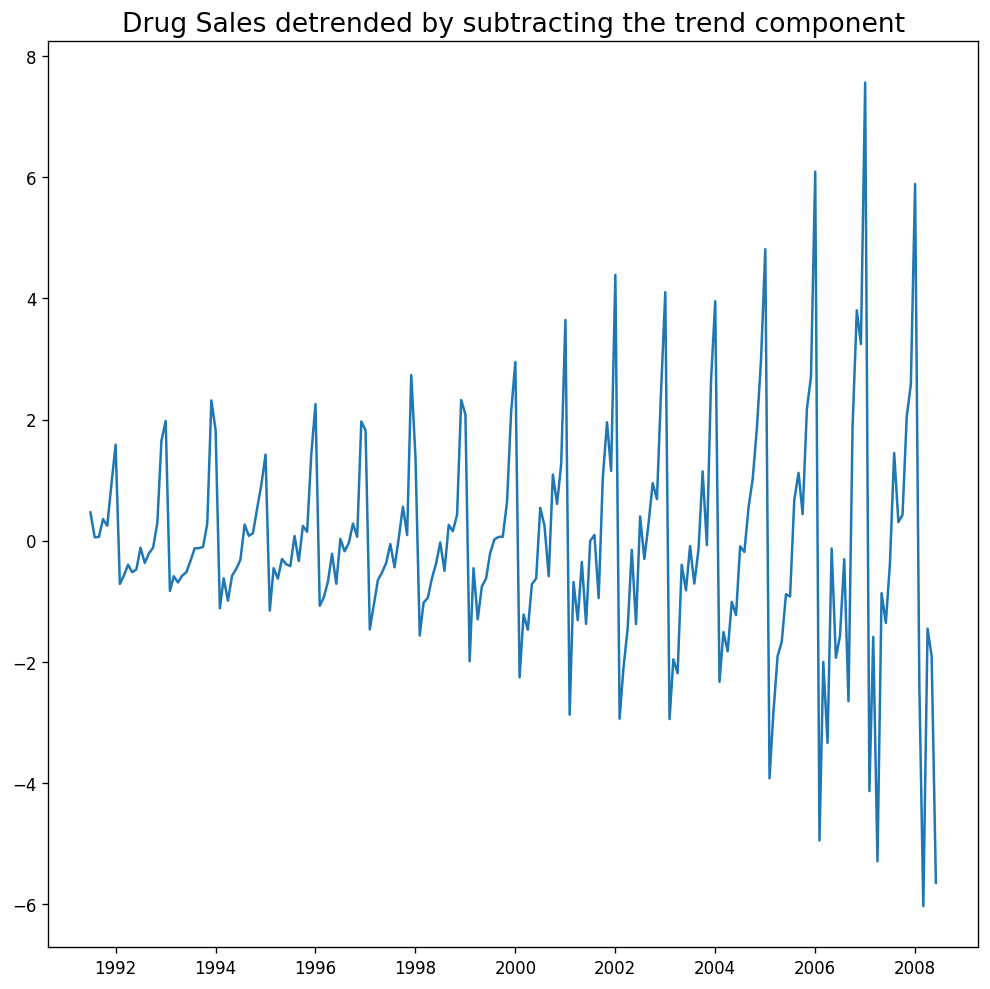

In [71]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

# ¿Cómo desestacionalizar una serie temporal? 

* También existen múltiples enfoques para desestacionalizar una serie de tiempo. A continuación se muestran algunos:

1. Tome una media móvil con la longitud como ventana estacional. Esto se suavizará en serie en el proceso.
2. Diferencia estacional de la serie (restar el valor de la temporada anterior del valor actual)
3. Dividir la serie por el índice estacional obtenido de la descomposición STL

* Si dividir por el índice estacional no funciona bien, intente tomar un logaritmo de la serie y luego haga la desestacionalización. Luego puede restaurar a la escala original tomando un exponencial. 

[]

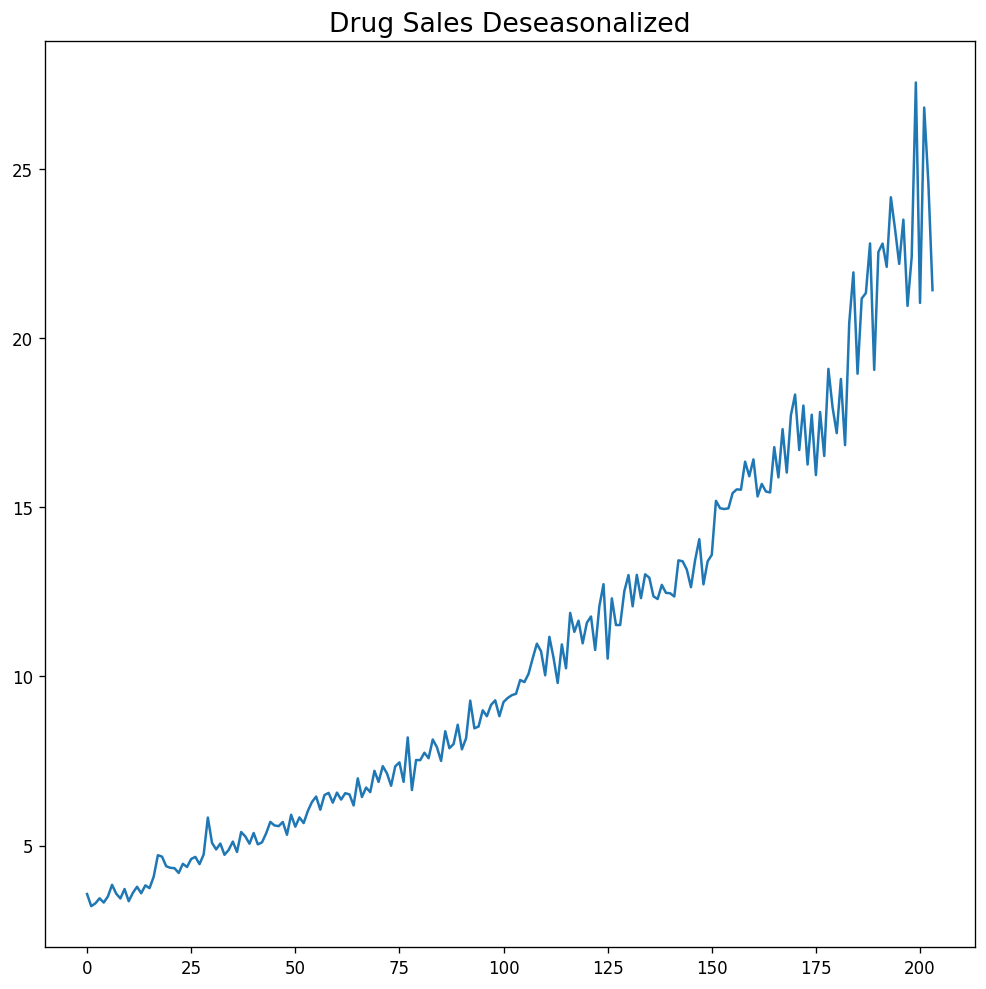

In [73]:
# Subtracting the Trend Component.
df = datosDf

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq', period=12)

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

# ¿Cómo probar la estacionalidad de una serie temporal? 

* La forma común es trazar la serie y verificar patrones repetibles en intervalos de tiempo fijos. Entonces, los tipos de estacionalidad están determinados por el reloj o el calendario:

     - Hora del dia
     - Dia del mes
     - Semanal
     - Mensual
     - Anual

* Sin embargo, si desea una inspección más definitiva de la estacionalidad, utilice el gráfico de la función de autocorrelación (ACF). Más sobre el ACF en las próximas secciones. Pero cuando hay un patrón estacional fuerte, el gráfico ACF generalmente revela picos repetidos definitivos en los múltiplos de la ventana estacional.

* Por ejemplo, la serie temporal de ventas de medicamentos es una serie mensual con patrones que se repiten todos los años. Por lo tanto, puede ver picos en las líneas 12, 24, 36 ...

* Debo advertirle que en conjuntos de datos de palabras reales, estos patrones tan fuertes apenas se notan y pueden distorsionarse con cualquier ruido, por lo que necesita una atención cuidadosa para capturar estos patrones. 

* Alternativamente, si desea una prueba estadística, [CHTest](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.CHTest.html#pmdarima.arima.CHTest) puede determinar si se requiere diferenciación estacional para estacionar la serie. 

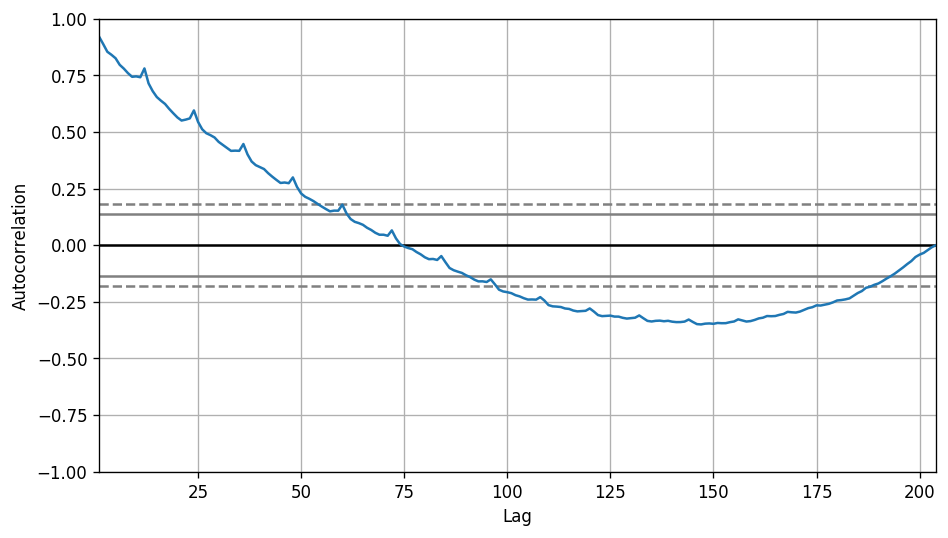

In [75]:
from pandas.plotting import autocorrelation_plot
df = datosDf

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

# ¿Cómo tratar los valores perdidos en una serie de tiempo? 

* A veces, su serie temporal tendrá fechas / horas faltantes. Eso significa que los datos no se capturaron o no estuvieron disponibles para esos períodos. Podría suceder que la medición fuera cero en esos días, en cuyo caso, puede completar esos períodos con cero.

* En segundo lugar, cuando se trata de series de tiempo, normalmente NO debe reemplazar los valores faltantes con la media de la serie, especialmente si la serie no es estacionaria. Lo que podría hacer en su lugar para una solución rápida y sucia es reenviar el valor anterior.

* Sin embargo, dependiendo de la naturaleza de la serie, querrá probar varios enfoques antes de concluir. Algunas alternativas efectivas a la imputación son:

    - Relleno hacia atrás
    - Interpolación linear
    - Interpolación cuadrática
    - Media de vecinos más cercanos
    - Media de las contrapartes estacionales
    

* Para medir el rendimiento de la imputación, introduzco manualmente los valores faltantes en la serie de tiempo, los imputo con los enfoques anteriores y luego mido el error cuadrático medio de los imputados contra los valores reales. 

* También puede considerar los siguientes enfoques según la precisión con la que desee que sean las imputaciones.

     - Si tiene variables explicativas, use un modelo de predicción como el bosque aleatorio o k-Vecinos más cercanos para predecirlo.
     - Si tiene suficientes observaciones pasadas, pronostique los valores faltantes.
     - Si tiene suficientes observaciones futuras, retroceda los valores faltantes
     - Previsión de contrapartes de ciclos anteriores. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice


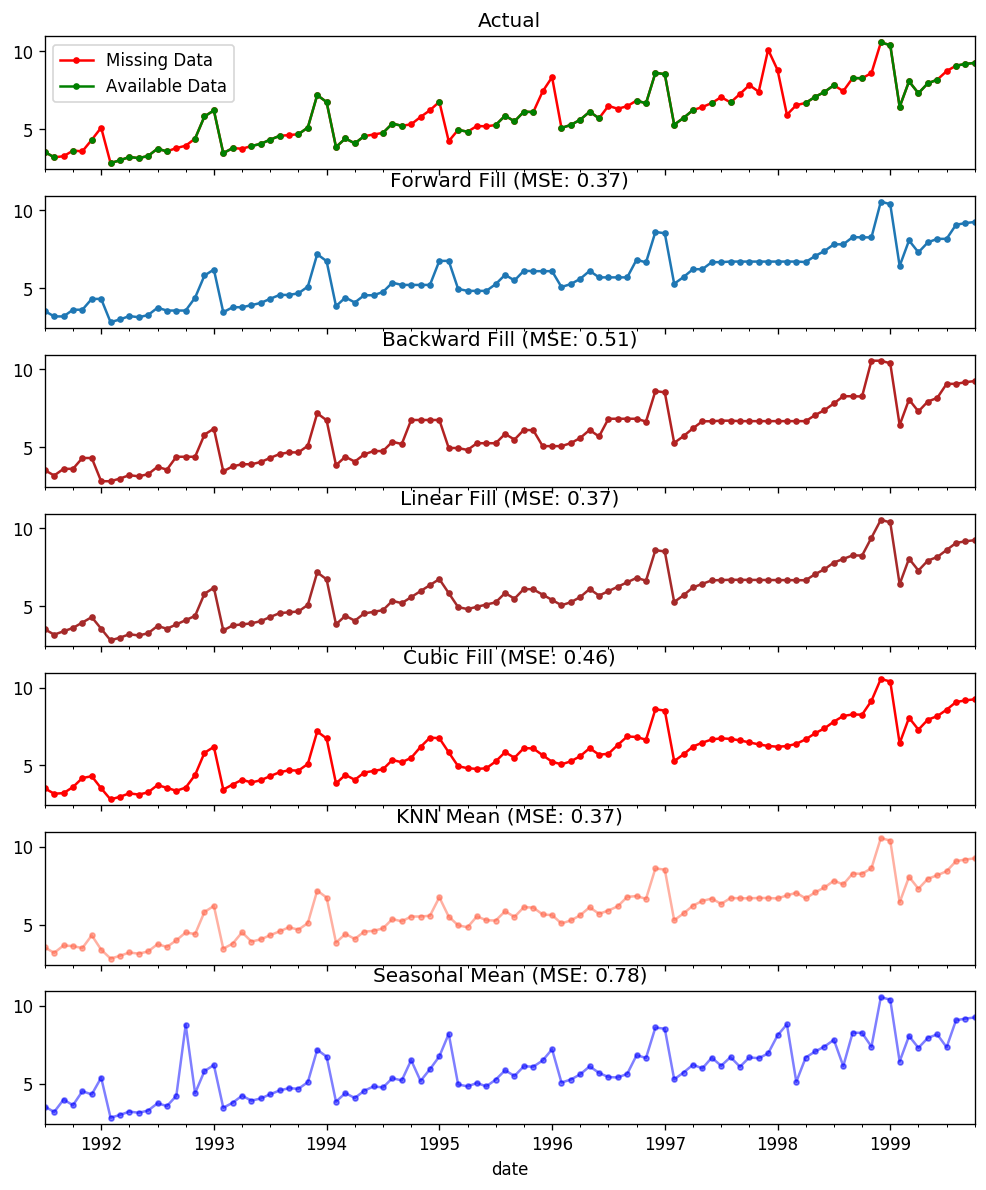

In [85]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('serie.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

# ¿Qué son las funciones de autocorrelación y autocorrelación parcial? 

* La autocorrelación es simplemente la correlación de una serie con sus propios rezagos. Si una serie está significativamente autocorrelacionada, eso significa que los valores anteriores de la serie (rezagos) pueden ser útiles para predecir el valor actual.

* La autocorrelación parcial también transmite información similar, pero transmite la correlación pura de una serie y su rezago, excluyendo las contribuciones de correlación de los rezagos intermedios. 

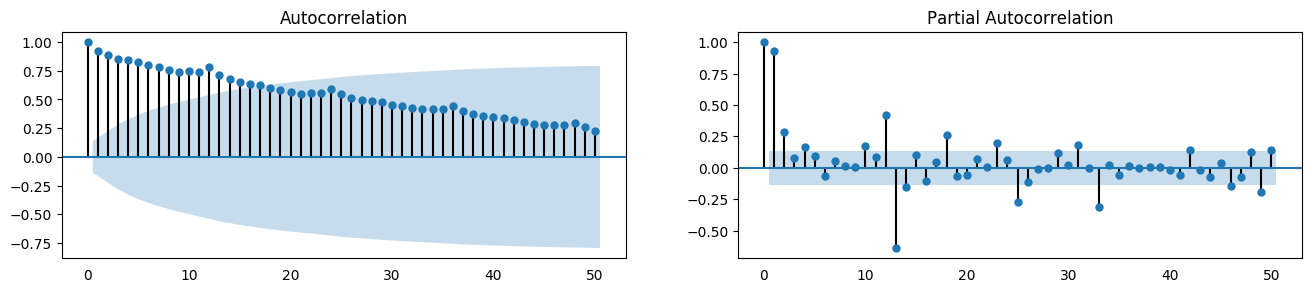

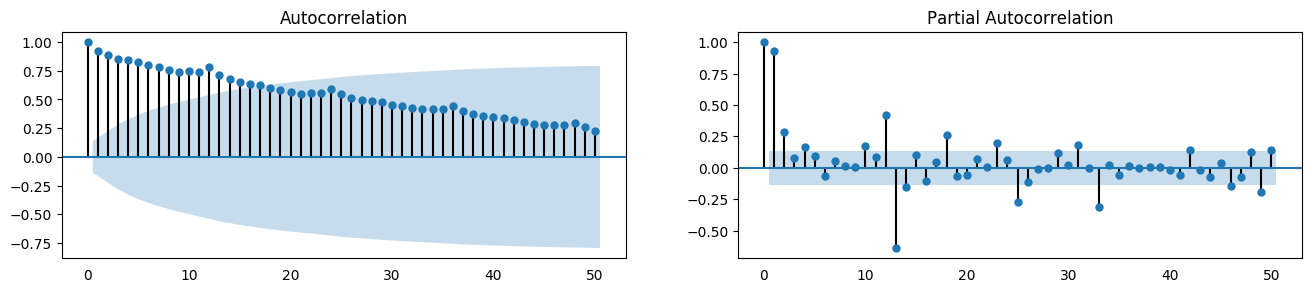

In [86]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = datosDf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

# Sobre la función de autocorrelación parcial.

* Entonces, ¿cómo calcular la autocorrelación parcial?

* La autocorrelación parcial del rezago (k) de una serie es el coeficiente de ese rezago en la ecuación de autorregresión de Y. La ecuación autorregresiva de Y no es más que la regresión lineal de Y con sus propios rezagos como predictores.

* Por ejemplo, si $Y_t$ es la serie actual y $Y_{t-1}$ es el retraso 1 de Y, entonces la autocorrelación parcial del retraso 3 $Y_{t-3}$ es el coeficiente $\alpha_{3}$ de $Y_{t-3}$ en la siguiente ecuación: $Y_t = \alpha_{0} + \alpha_{1} Y_{t-1} + \alpha_{2} Y_{t-2} + \alpha_{3} Y_{t-3}$

# Gráficos de rezagos

* Este es un gráfico de dispersión de una serie de tiempo frente a un retraso de sí mismo. Normalmente se utiliza para comprobar la autocorrelación. Si existe algún patrón en la serie como el que ve a continuación, la serie está autocorrelacionada. Si no existe tal patrón, es probable que la serie sea ruido blanco aleatorio.

* En el siguiente ejemplo sobre series de tiempo del área de las manchas solares, las gráficas se dispersan cada vez más a medida que aumenta n_lag. 

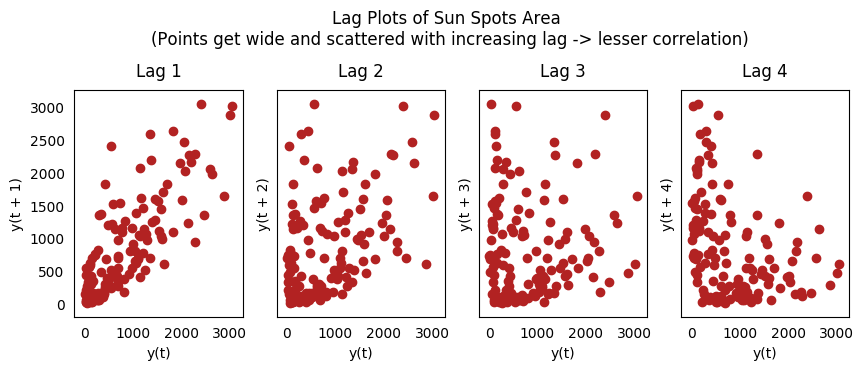

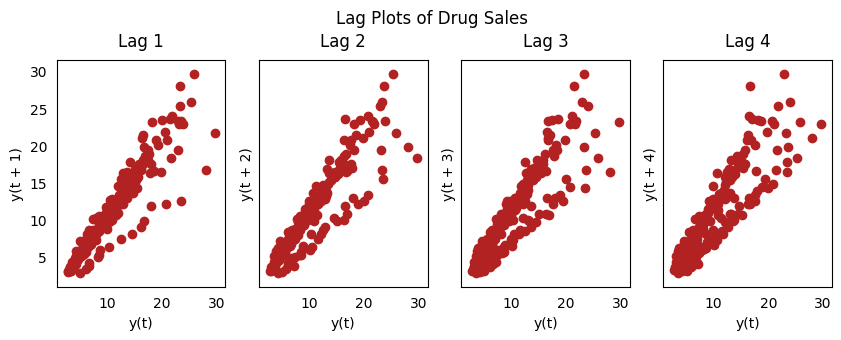

In [87]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('sunspotarea.csv')
a10 = pd.read_csv('a10.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

# ¿Cómo estimar la previsibilidad o capacidad de pronóstico de una serie temporal?

* Cuantos más patrones regulares y repetibles tenga una serie de tiempo, más fácil será pronosticar. La "Entropía aproximada" se puede utilizar para cuantificar la regularidad y la imprevisibilidad de las fluctuaciones en una serie de tiempo.

* Cuanto mayor sea la entropía aproximada, más difícil será pronosticarla. Otra alternativa mejor es la "Entropía de muestra".

* La entropía de muestra es similar a la entropía aproximada, pero es más consistente al estimar la complejidad incluso para series de tiempo más pequeñas. Por ejemplo, una serie de tiempo aleatoria con menos puntos de datos puede tener una "entropía aproximada" más baja que una serie de tiempo más "regular", mientras que una serie de tiempo aleatoria más larga tendrá una "entropía aproximada" más alta.

* `Sample Entropy` maneja este problema muy bien. Vea la demostración a continuación. 

In [90]:
# https://en.wikipedia.org/wiki/Approximate_entropy
ss = pd.read_csv('sunspotarea.csv')
a10 = pd.read_csv('a10.csv')
rand_small = np.random.randint(0, 100, size=100)
rand_big = np.random.randint(0, 100, size=500)

# U es el conjunto de datos
# m la cantidad de dimensiones o ejes
# r es la tolerancia dependiente de la desviación estándar de los datos
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(ss.value, m=2, r=0.2*np.std(ss.value)))     
print(ApEn(a10.value, m=2, r=0.2*np.std(a10.value)))   
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) 
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     

0.6514704970333534
0.5374775224973489
0.4434741504048212
1.433139558202929


In [91]:
# https://en.wikipedia.org/wiki/Sample_entropy

# U es el conjunto de datos
# m la cantidad de dimensiones o ejes
# r es la tolerancia dependiente de la desviación estándar de los datos
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ss.value, m=2, r=0.2*np.std(ss.value)))      
print(SampEn(a10.value, m=2, r=0.2*np.std(a10.value)))   
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      

0.7853311366380039
0.41887013457621214
2.662587827025453
2.1461549501328325


# Suavización de Series de Tiempo

* El suavizado de una serie temporal puede resultar útil para reducir el efecto del ruido en una señal, se obtiene una aproximación justa de la serie filtrada por ruido. La versión suavizada de la serie se puede utilizar como una característica para explicar la propia serie original. Visualice mejor la tendencia subyacente

* Entonces, ¿cómo suavizar una serie? Analicemos los siguientes métodos:
    - Toma una media móvil
    - Hacer un suavizado LOESS (regresión localizada)
    - Hacer un suavizado LOWESS  (regresión ponderada localmente)

* El promedio móvil no es más que el promedio de una ventana móvil de ancho definido. Pero debe elegir sabiamente el ancho de la ventana, porque un tamaño de ventana grande suavizará demasiado la serie. Por ejemplo, un tamaño de ventana igual a la duración estacional (por ejemplo: 12 para una serie mensual) anulará efectivamente el efecto estacional.

* LOESS, abreviatura de "LOcalized regrESSion" se ajusta a regresiones múltiples en la vecindad local de cada punto. Se implementa en el paquete `statsmodels`, donde puede controlar el grado de suavizado usando el argumento `frac` que especifica el porcentaje de puntos de datos cercanos que deben considerarse para ajustarse a un modelo de regresión. 

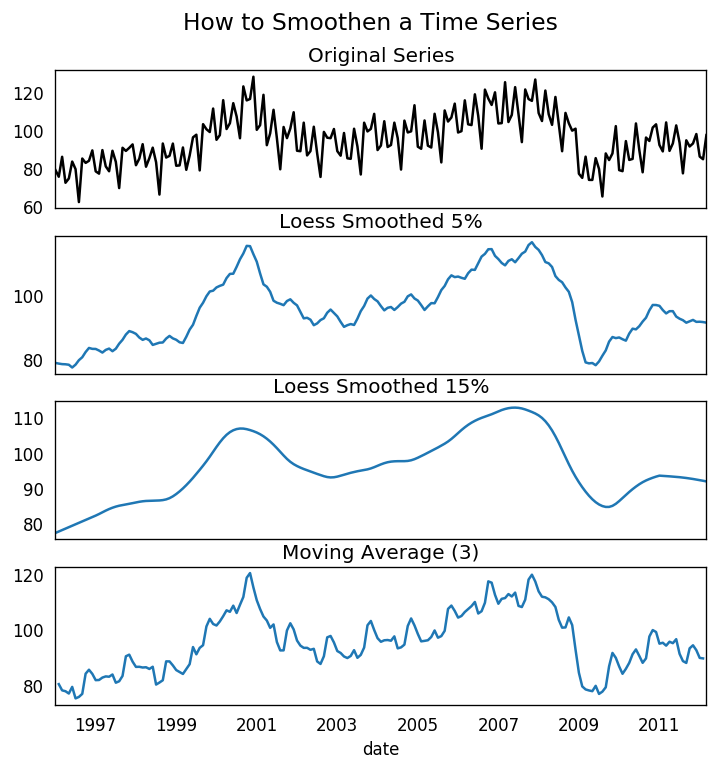

In [93]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

# Prueba de causalidad de Granger para saber si una serie de tiempo es útil para pronosticar otra. 

* La prueba de causalidad de Granger se utiliza para determinar si una serie de tiempo será útil para pronosticar otra.

* ¿Cómo funciona la prueba de causalidad de Granger? Se basa en la idea de que si X causa Y, entonces el pronóstico de Y basado en valores previos de Y Y los valores anteriores de X deben superar el pronóstico de Y basado solo en valores anteriores de Y. Por lo tanto, comprenda que la causalidad de Granger no debe usarse para probar si un retraso de Y causa Y. En cambio, generalmente se usa solo en variables exógenas (no en el retraso Y).

* Está implementado en el paquete statsmodel. Acepta una matriz 2D con 2 columnas como argumento principal. Los valores están en la primera columna y el predictor (X) está en la segunda columna.

* La hipótesis nula es: la serie en la segunda columna, Granger no causa la serie en la primera. Si los P-Values son menores que un nivel de significancia (0.05), entonces rechaza la hipótesis nula y concluye que dicho rezago de X es realmente útil. El segundo argumento maxlag dice hasta cuántos rezagos de Y deben incluirse en la prueba. 

* En este caso, los valores P son cero para todas las pruebas. Por tanto, el "mes" se puede utilizar para pronosticar ventas de medicamentos.

In [94]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.7796748355736, 3.661425871353102e-12, 200.0, 1),
   'ssr_chi2test': (55.6013699581072, 8.876175235021508e-14, 1),
   'lrtest': (49.14260233004984, 2.38014300604565e-12, 1),
   'params_ftest': (54.77967483557335, 3.661425871353419e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.69891799873236, 1.9133235086857257e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227346, 3.5267600881280646e-73, 2),
   'lrtest': (196.99559277182186, 1.6709003499116746e-43, 2),
   'params_ftest': (162.69891799873227, 1.9133235086857535e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

# Modelos Autorregresivos de Medias Móviles (ARIMA)

* Con el modelo ARIMA, puede pronosticar una serie de tiempo utilizando los valores pasados de la serie. En esta publicación, construimos un modelo ARIMA óptimo desde cero y lo ampliamos a los modelos Seasonal ARIMA (SARIMA) y SARIMAX. También verá cómo construir modelos de autoarima en python.

* Partimos de los conceptos básicos y comprendimos varias características de una serie temporal. Una vez que se realiza el análisis, el siguiente paso es comenzar a pronosticar.


* Uno de los ejemplos clásicos de pronóstico es que en la mayoría de las empresas de fabricación, impulsa las actividades fundamentales de planificación empresarial, adquisiciones y producción. Cualquier error en los pronósticos se extenderá a lo largo de la cadena de suministro o en cualquier contexto comercial. Por lo tanto, es importante que los pronósticos sean precisos para ahorrar costos y es fundamental para el éxito. No solo en la fabricación, las técnicas y conceptos detrás de la previsión de series de tiempo son aplicables en cualquier negocio.

* Ahora, la predicción de una serie de tiempo se puede dividir en dos tipos.

    - Si usa solo los valores anteriores de la serie de tiempo para predecir sus valores futuros, se llama Pronóstico de serie de tiempo univariante / univariado.

    - Y si utiliza predictores distintos de la serie (también conocidos como variables exógenas), se denomina Pronóstico de series de tiempo multivariante / multivariado.

* ARIMA, abreviatura de "Autorregresivos Integrados de Media Móvil", es un algoritmo de pronóstico basado en la idea de que la información de los valores pasados de la serie temporal puede utilizarse por sí sola para predecir los valores futuros. 

* ARIMA también se refiere a una clase de modelos que 'explica' una serie de tiempo determinada en función de sus propios valores pasados, es decir, sus propios retrasos y los errores de pronóstico retrasados, de modo que se puede utilizar la ecuación para pronosticar valores futuros.

* Cualquier serie de tiempo "no estacional" que muestre patrones y no sea un ruido blanco aleatorio se puede modelar con modelos ARIMA.

* Un modelo ARIMA se caracteriza por 3 términos: p, d, q
    - p es el orden del término AR (se refiere a los rezagos de Y)
    - q es el orden del término MA (se refiere a los rezagos del promedio de Y)
    - d es el número de diferenciaciones necesarias para que la serie de tiempo sea estacionaria

* Si una serie de tiempo tiene patrones estacionales, entonces necesita agregar términos estacionales y se convierte en SARIMA, abreviatura de "Seasonal ARIMA".

* Porque, el término "Auto regresivo" en ARIMA significa que es un modelo de regresión lineal que utiliza sus propios retrasos como predictores. Los modelos de regresión lineal, como sabe, funcionan mejor cuando los predictores no están correlacionados y son independientes entre sí.

* Recordemos, ¿cómo hacer estacionaria una serie? El enfoque común es diferenciarlo. Es decir, reste el valor anterior del valor actual. A veces, dependiendo de la complejidad de la serie, es posible que se necesite más de una diferenciación.

    - El valor de d, por lo tanto, es el número mínimo de diferenciaciones necesarias para que la serie sea estacionaria. 
    - Y si la serie de tiempo ya es estacionaria, entonces d = 0.

* "p" es el orden del término "Auto regresivo" (AR), pueden ser consecutivos o no. Se refiere al número de rezagos de Y que se utilizarán como predictores. Y "q" es el orden del término "Media móvil" (MA). 

* Un modelo auto regresivo puro (solo AR) es aquel en el que $Y_t$ depende solo de sus propios rezagos. Es decir, $Y_t$ es una función de los "rezagos de $Y_t$". Es decir: $Y_t= \alpha + \beta_1Y_{t-1} + \beta_2Y_{t-2}+ ... + \beta_p Y_{t-p} + \epsilon_t$ Donde, $Y_{t-1}$ es el rezago 1 de la serie, $\beta_1 $ es el coeficiente de rezago 1 que estima el modelo y $\alpha$ es el intercepto, también estimado por el modelo.

* Del mismo modo, un modelo puro de media móvil (solo MA) es uno en el que $Y_t$ depende solo de los errores de pronóstico retrasados. Es decir:  $Y_t= \alpha + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2} + ... + \phi_q \epsilon_{t-q}$ donde los términos de error son los errores de los modelos autorregresivos de los respectivos rezagos. Los errores $\epsilon_{1}$ y $\epsilon_{t-1}$ son los errores de las siguientes ecuaciones:
  $$Y_t= \beta_1Y_{t-1} + \beta_2Y_{t-2}+ ...  + \epsilon_t$$
  $$Y_{t-1}= \beta_2Y_{t-2} + \beta_3Y_{t-3}+ ...  + \epsilon_{t-1}$$
 

* Entonces, ¿cómo se integra AR y MA en un modelo ARIMA? Un modelo ARIMA es aquel en el que la serie de tiempo se diferencia al menos una vez para hacerlo estacionario y se combinan los términos AR y MA. Entonces la ecuación resultante es:

 $Y_t= \alpha + \beta_1Y_{t-1} + \beta_2Y_{t-2}+ ... + \beta_p Y_{t-p} + \epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2} + ... + \phi_q \epsilon_{t-q}$

* En términos sencillos: La Predicción de Yt = Constante + Combinación lineal Rezagos de Y (hasta p rezagos) + Combinación lineal de errores de pronóstico retrasados (hasta q rezagos)

* Entonces en este tipo de modelos, uno de los principales objetios es  identificar los valores de p, d y q. 


## Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA

* Recordemos, El propósito de diferenciarlo para hacer estacionaria la serie de tiempo.

* Pero debes tener cuidado de no diferenciar demasiado la serie. Porque, una serie sobrediferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

* El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que deambula alrededor de una media definida y la gráfica ACF llega a cero con bastante rapidez.

* Si las autocorrelaciones son positivas para muchos rezagos (10 o más), entonces la serie necesita una mayor diferenciación. Por otro lado, si la autocorrelación de retardo 1 en sí es demasiado negativa, entonces la serie probablemente esté sobrediferenciada.

* En el caso, no puede realmente decidir entre dos órdenes de diferenciación, luego elija el orden que dé la menor desviación estándar en la serie diferenciada.

### Ejemplo: 

* Primero, se verifica si la serie está estacionaria usando la prueba Augmented Dickey Fuller - ADF (`adfuller()`), del paquete `statsmodels`.

* Solo necesita diferenciar si la serie no es estacionaria. De lo contrario, no se necesita diferenciación, es decir, d = 0.

* La hipótesis nula de la prueba ADF (Dickey-Fuller aumentada) es que la serie de tiempo no es estacionaria. Entonces, si el valor p de la prueba es menor que el nivel de significancia (0.05), entonces rechaza la hipótesis nula e infiere que la serie de tiempo es de hecho estacionaria.

* Entonces, en nuestro caso, si P Value> 0.05 seguimos adelante con la búsqueda del orden de diferenciación. 

In [97]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

# Continuamos con la serie de conexiones a un server de internet
df = pd.read_csv('wwwusage.csv', names=['value'], header=0)
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


* Dado que el valor P es mayor que el nivel de significancia, diferenciamos la serie y veamos cómo se ve el gráfico de autocorrelación. 

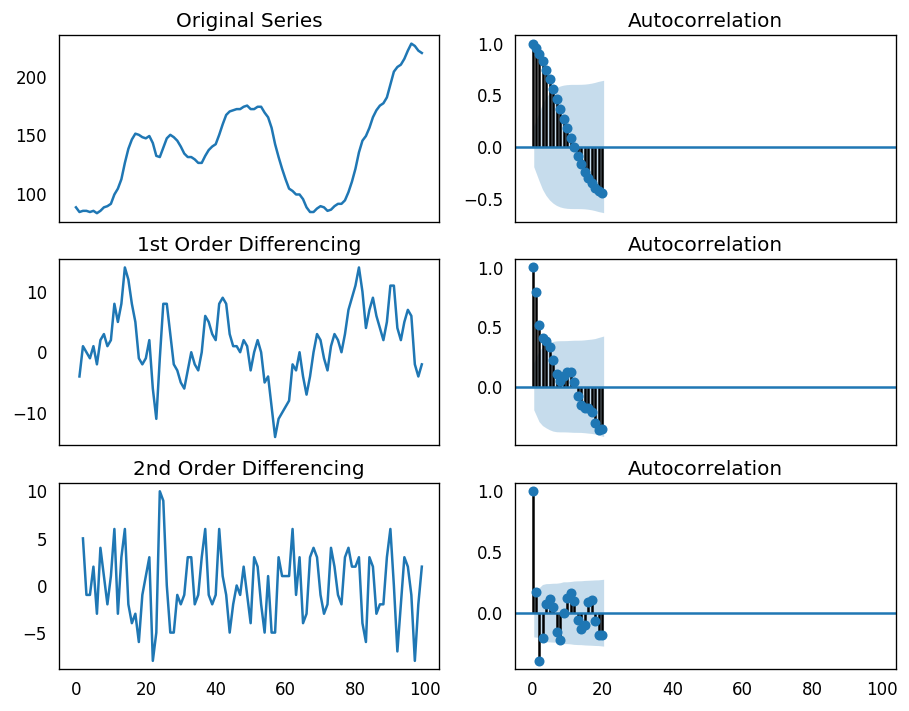

In [107]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
# df = pd.read_csv('wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

* Para la serie anterior, la serie temporal alcanza la estacionariedad con dos órdenes de diferenciación. Pero al mirar el gráfico de autocorrelación para la segunda diferenciación, el retraso entra en la zona negativa lejana bastante rápido, lo que indica que la serie podría haber sido sobrediferenciada.

* Por lo tanto, voy a fijar provisionalmente el orden de diferenciación como 1 aunque la serie no sea perfectamente estacionaria (estacionariedad débil). 

In [111]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
print(ndiffs(y, test='adf'))  # 2

# KPSS test
print(ndiffs(y, test='kpss')) # 0

# PP test:
print(ndiffs(y, test='pp'))  # 2

2
0
2


## Cómo encontrar el orden del término AR (p)

* El siguiente paso es identificar si el modelo necesita algún término de AR. Puede averiguar el número requerido de términos AR inspeccionando el gráfico de Autocorrelación parcial (PACF).

* La autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, después de excluir las contribuciones de los rezagos intermedios. Entonces, PACF transmite la correlación pura entre un retraso y la serie. De esa manera, sabrá si ese retraso es necesario en el plazo de AR o no.

* La autocorrelación parcial del rezago (k) de una serie es el coeficiente de ese rezago en la ecuación de autorregresión de Y.

$$Y_t= \alpha_0 + \alpha_1Y_{t-1} + \alpha_2Y_{t-2}+ \alpha_3Y_{t-3}$$

* Es decir, suponga que si $Y_t$ es la serie actual y $Y_{t-1}$ es el rezago 1 de Y, entonces la autocorrelación parcial del rezago 3 ($Y_{t-3}$) es el coeficiente $\alpha_3$ de $Y_{t-3}$ en la ecuación anterior.

* Cualquier autocorrelación en una serie estacionaria se puede rectificar agregando suficientes términos AR. Entonces, inicialmente tomamos el orden del término AR como igual a tantos rezagos que cruzan el límite de significancia en la gráfica PACF. 

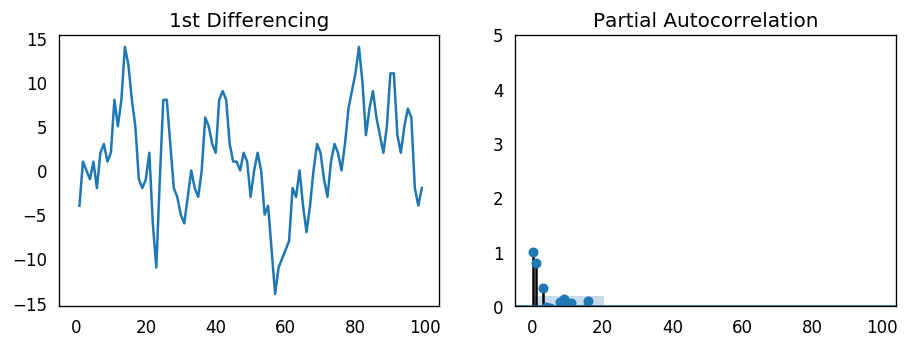

In [112]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

* Puede observar que el retraso PACF 1 es bastante significativo ya que está muy por encima de la línea de importancia. El retardo 2 también resulta significativo, logrando cruzar levemente el límite de significancia (región azul). Pero voy a ser conservador y tentativamente fijaré la p como 1. 

## Cómo encontrar el orden del término MA (q)

* De la misma forma que observamos el gráfico PACF para el número de términos AR, puede mirar el gráfico ACF para el número de términos MA. Un término MA es técnicamente el error del pronóstico retrasado.

* El ACF indica cuántos términos MA se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.

* Veamos el gráfico de autocorrelación de la serie diferenciada. 

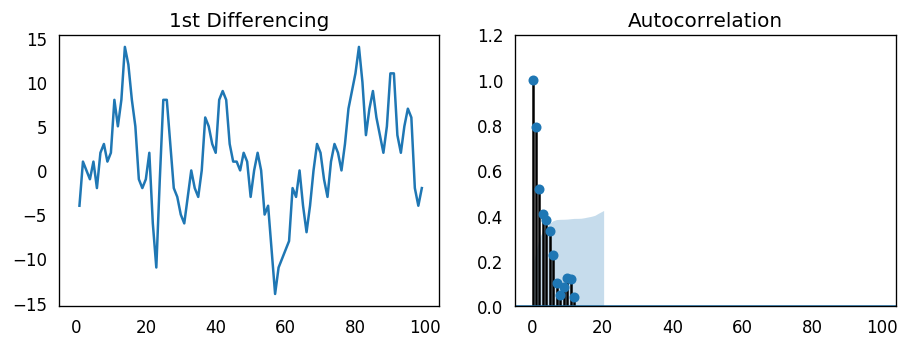

In [113]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

* Un par de retrasos están muy por encima de la línea de importancia. Entonces, fijemos tentativamente q como 2. En caso de duda, opte por el modelo más simple que explique suficientemente la Y. 

# Cómo construir el modelo ARIMA

* Ahora que se han determinado los valores de p, d y q, se tiene todo lo necesario para ajustarse al modelo ARIMA. Usemos la implementación `ARIMA()` en el paquete statsmodels. 

In [115]:
import warnings
warnings.filterwarnings('ignore')
                        
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Fri, 14 May 2021   AIC                            517.579
Time:                        16:32:02   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.385      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.014       0.131       1.139
ma.L1.D.value     0.5287      0.355     

* El resumen del modelo revela mucha información. La tabla en el medio es la tabla de coeficientes donde los valores bajo "coef" son los pesos de los términos respectivos.

* Observe aquí que el coeficiente del término MA2 es cercano a cero y el valor P en la columna "P> | z |" es muy insignificante. Idealmente, debería ser menor que 0.05 para que la X respectiva sea significativa.

* Entonces, reconstruyamos el modelo sin el término MA2. 

In [116]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Fri, 14 May 2021   AIC                            515.579
Time:                        16:33:34   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1205      1.286      0.871      0.384      -1.400       3.641
ar.L1.D.value     0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.value     0.5297      0.089     

* El modelo AIC se ha reducido, lo cual es bueno. Los valores P de los términos AR1 y MA1 han mejorado y son altamente significativos (<< 0.05).

* Grafiquemos los residuos para asegurarnos de que no haya patrones (es decir, busque la media y la varianza constantes). 

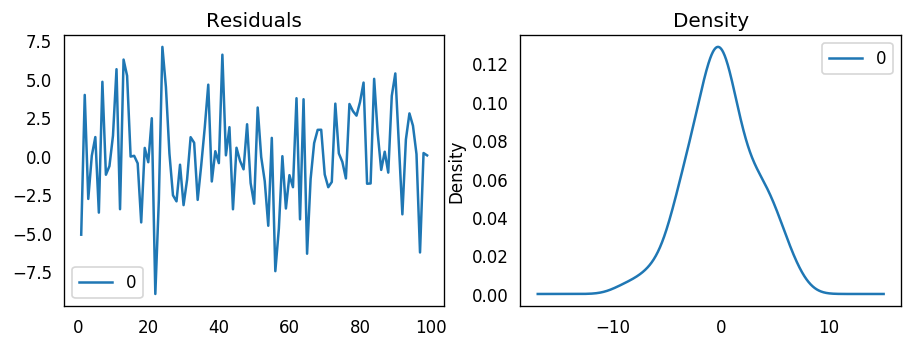

In [117]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

* Los errores residuales parecen estar bien con una media cercana a cero y una varianza uniforme. Grafiquemos los datos reales contra los valores ajustados usando plot_predict (). 

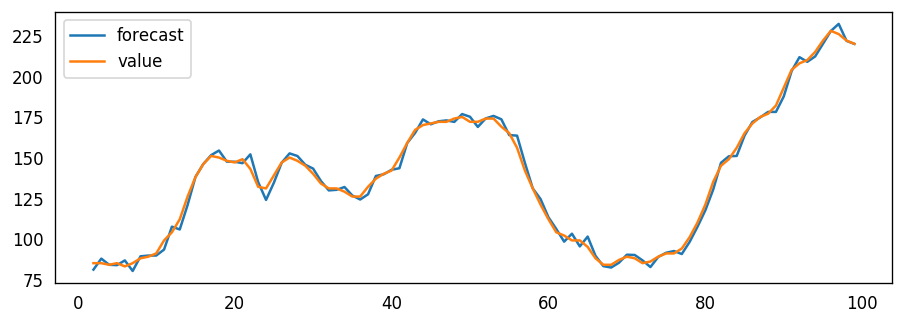

In [118]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

* Cuando establece dynamic = False, los valores rezagados en la muestra se utilizan para la predicción.

* Es decir, el modelo se entrena hasta el valor anterior para realizar la próxima predicción. Esto puede hacer que el pronóstico ajustado y los datos reales se vean artificialmente bien.

* Entonces, parece que tenemos un modelo ARIMA apropiado. ¿Pero es eso lo mejor?

* No puedo decir eso en este momento porque en realidad no hemos pronosticado el futuro ni hemos comparado el pronóstico con el rendimiento real.

* Por lo tanto, la validación real que necesita ahora es la validación cruzada fuera de tiempo. 

## Cómo encontrar el modelo ARIMA óptimo manualmente mediante la validación cruzada

* En la validación cruzada, retrocede unos pocos pasos en el tiempo y pronostica en el futuro tantos pasos hacia atrás. Luego, compara el pronóstico con los reales.

* Para realizar una validación cruzada fuera de tiempo, debe crear el conjunto de datos de entrenamiento y prueba dividiendo la serie de tiempo en 2 partes contiguas en una proporción de aproximadamente 75:25 o una proporción razonable basada en la frecuencia de tiempo de la serie.

* ¿Por qué no estoy muestreando los datos de entrenamiento al azar? Esto se debe a que la secuencia de orden de la serie temporal debe estar intacta para poder usarla en la previsión. 

In [119]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

* Ahora puede construir el modelo ARIMA en el conjunto de datos de entrenamiento, pronosticarlo y dibujarlo. 

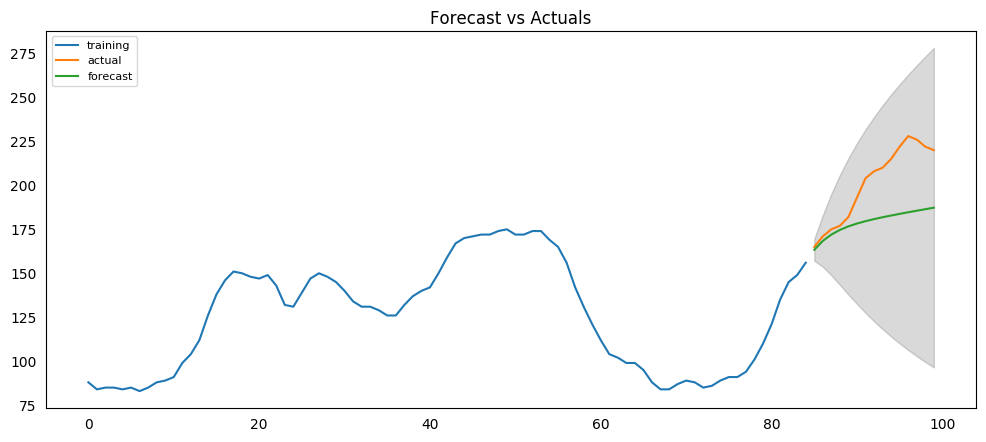

In [120]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

* A partir del gráfico, el modelo ARIMA (1,1,1) parece dar un pronóstico direccionalmente correcto. Y los valores reales observados se encuentran dentro de la banda de confianza del 95%. Eso parece estar bien.

* Pero cada uno de los pronósticos previstos está consistentemente por debajo de los reales. Eso significa que, al agregar una pequeña constante a nuestro pronóstico, la precisión ciertamente mejorará. Por lo tanto, definitivamente hay margen de mejora.

* Entonces, lo que voy a hacer es aumentar el orden de diferenciación a dos, es decir, establecer d = 2 y aumentar iterativamente p hasta 5 y luego q hasta 5 para ver qué modelo da menos AIC y también buscar un gráfico que ofrece datos reales y pronósticos más cercanos.

* Mientras hago esto, vigilo los valores P de los términos AR y MA en el resumen del modelo. Deben estar tan cerca de cero, idealmente, menos de 0.05. 

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.248
Method:                       css-mle   S.D. of innovations              3.153
Date:                Fri, 14 May 2021   AIC                            440.497
Time:                        16:41:42   BIC                            455.010
Sample:                             2   HQIC                           446.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0483      0.084      0.577      0.564      -0.116       0.212
ar.L1.D2.value     1.1386      0.109     10.399      0.000       0.924       1.353
ar.L2.D2.value    -0.5923      0.155

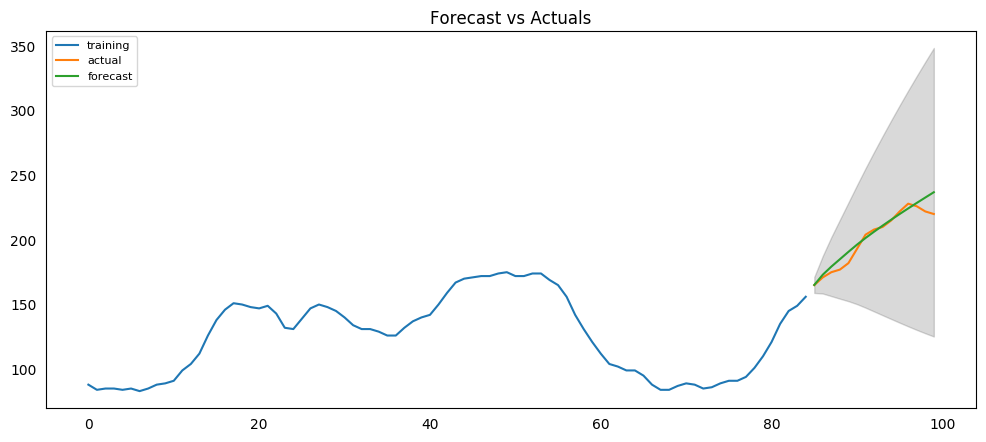

In [121]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

* El AIC se ha reducido a 440 de 515. Bien. Los valores P de los términos X son menos <0.05, lo cual es genial. Entonces, en general, es mucho mejor.

* Idealmente, debería retroceder varios puntos en el tiempo, por ejemplo, retroceder 1, 2, 3 y 4 trimestres y ver cómo se están desempeñando sus pronósticos en varios puntos del año.

* Este es un excelente ejercicio: intente retroceder 27, 30, 33, 36 puntos de datos y vea cómo funciona el pronóstico. El rendimiento del pronóstico se puede juzgar utilizando varias métricas de precisión que se analizan a continuación. 


## Métricas de precisión para el pronóstico de series de tiempo

* Las métricas de precisión comúnmente utilizadas para juzgar los pronósticos son:

     - Error de porcentaje absoluto medio (MAPE)
     - Error medio (ME)
     - Error absoluto medio (MAE)
     - Error de porcentaje medio (MPE)
     - Error cuadrático medio (RMSE)
     - Autocorrelación de error con retraso 1 (ACF1)
     - Correlación entre el real y el pronóstico (corr)
     - Error mínimo-máximo (minmax)

* Por lo general, si está comparando pronósticos de dos series diferentes, se pueden usar MAPE, Correlación y Error Mín-Máx. ¿Por qué no utilizar las otras métricas? Debido a que solo los tres anteriores son errores porcentuales que varían entre 0 y 1. De esa manera, puede juzgar qué tan bueno es el pronóstico independientemente de la escala de la serie.

* Las otras métricas de error son cantidades. Eso implica que un RMSE de 100 para una serie cuya media está en 1000 es mejor que un RMSE de 5 para una serie en decenas. Por lo tanto, realmente no puede usarlos para comparar los pronósticos de dos series de tiempo escaladas diferentes. 

In [122]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.022501437547584012,
 'me': 3.230854890946811,
 'mae': 4.548347730567881,
 'mpe': 0.01642133821060209,
 'rmse': 6.373284525171391,
 'acf1': 0.51054935065353,
 'corr': 0.9674576270862356,
 'minmax': 0.02163165748301432}

* Alrededor del 2.2% de MAPE implica que el modelo tiene una precisión de aproximadamente un 97.8% para predecir las próximas 15 observaciones. 

* Ahora sabe cómo construir un modelo ARIMA manualmente. Pero en situaciones industriales, se le proporcionará una gran cantidad de series de tiempo para pronosticar y el ejercicio de pronóstico se repetirá con regularidad. Por tanto, necesitamos una forma de automatizar el mejor proceso de selección de modelos. 

# Cómo hacer Auto Arima Forecast en Python

Al igual que la popular función auto.arima () de R, el paquete pmdarima proporciona `auto_arima ()`. Esta utiliza un enfoque paso a paso para buscar múltiples combinaciones de parámetros p, d, q y elige el mejor modelo que tiene el menor AIC. 

In [123]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.49 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

## Interpretación de las gráficas de residuos en el modelo ARIMA

Revisemos las gráficas de residuos usando `stepwise_fit`. 

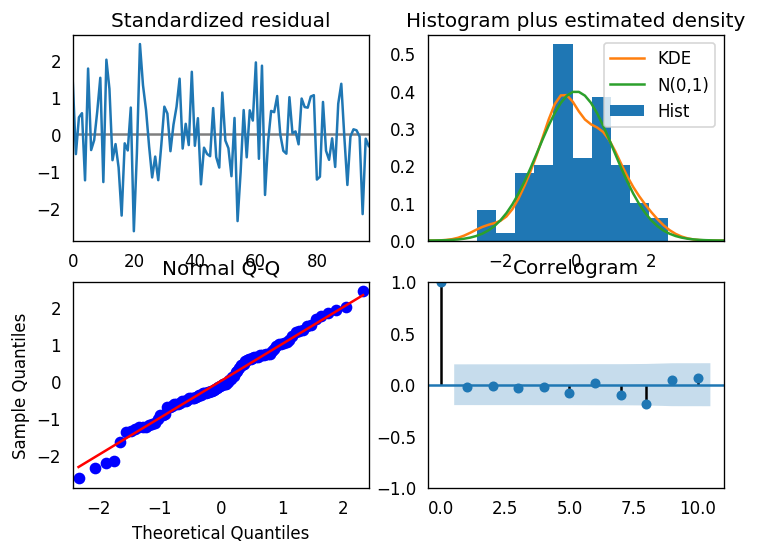

In [124]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

* Arriba a la izquierda: los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme.

* Arriba a la derecha: la gráfica de densidad sugiere una distribución normal con media cero.

* Abajo a la izquierda: todos los puntos deben estar perfectamente alineados con la línea roja. Cualquier desviación significativa implicaría que la distribución está sesgada.

* Abajo a la derecha: el correlograma, también conocido como gráfico ACF, muestra que los errores residuales no están autocorrelacionados. Cualquier autocorrelación implicaría que existe algún patrón en los errores residuales que no se explican en el modelo. Por lo tanto, deberá buscar más X (predictores) en el modelo.

* En general, parece encajar bien. Pronostiquemos. 

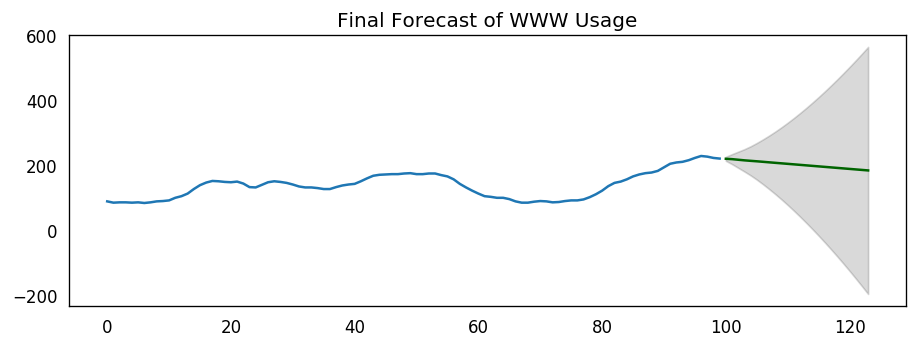

In [125]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

# Referencias 
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* https://www.kaggle.com/mobasshir/time-series-analysis
* https://www.machinelearningplus.com/time-series/time-series-analysis-python/